<a href="https://colab.research.google.com/github/Anaya666/demo/blob/main/datadesignmidterm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("datasciencedonut/olympic-swimming-1912-to-2020")

print("Path to dataset files:", path)

100%|██████████| 75.8k/75.8k [00:00<00:00, 34.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/datasciencedonut/olympic-swimming-1912-to-2020/versions/2


In [4]:
#loading the dataset
import os
# Define the directory path where the dataset is stored
directory_path = "/root/.cache/kagglehub/datasets/datasciencedonut/olympic-swimming-1912-to-2020/versions/2"

# List files in the directory
files = os.listdir(directory_path)
print("Files in directory:", files)  # This will help identify the correct CSV file

# Find the correct CSV file (assuming there's only one CSV file)
csv_files = [f for f in files if f.endswith(".csv")]

if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in the directory.")
elif len(csv_files) > 1:
    print("Multiple CSV files found, using the first one:", csv_files[0])

# Full path to the CSV file
file_path = os.path.join(directory_path, csv_files[0])

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Overview:")
print(df.info())

Files in directory: ['Olympic_Swimming_Results_1912to2020.csv']
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB
None


In [5]:
#checking for missing values
print(df.isnull().sum())
#replace missing values in athlete and results column with "unknown"
df["Athlete"].fillna("unknown", inplace=True)
df["Results"].fillna("unknown", inplace=True)
#checking for missing values
print(df.isnull().sum())

Location                 0
Year                     0
Distance (in meters)     0
Stroke                   0
Relay?                   0
Gender                   0
Team                     0
Athlete                 14
Results                 28
Rank                     0
dtype: int64
Location                0
Year                    0
Distance (in meters)    0
Stroke                  0
Relay?                  0
Gender                  0
Team                    0
Athlete                 0
Results                 0
Rank                    0
dtype: int64


<ipython-input-5-e81b364847f0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Athlete"].fillna("unknown", inplace=True)
<ipython-input-5-e81b364847f0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

exploration 1a-  I want to analyse the spread of Finishing Times in Different Decades from the year 1910 to 2020 using a box-plot.

<Figure size 1200x600 with 0 Axes>

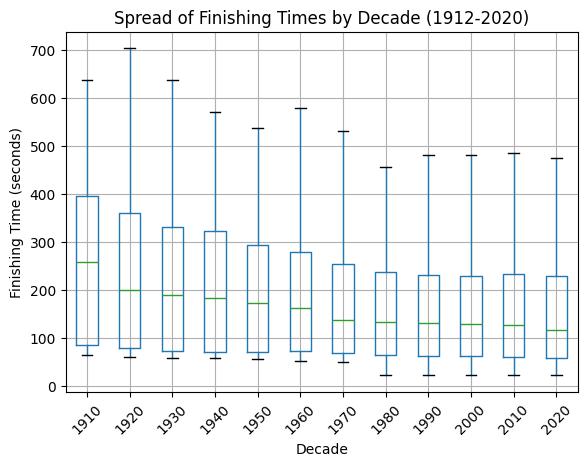

In [6]:
# Convert 'Year' to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Function to convert time to numeric (float, in seconds)
def time_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 3:  # HH:MM:SS.ssssss
            total_seconds = int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
            return total_seconds
        elif len(parts) == 2:  # MM:SS.ssssss
            total_seconds = int(parts[0]) * 60 + float(parts[1])
            return total_seconds
        else:
            return float(time_str)  # If it's already in seconds
    except:
        return None  # Handle errors gracefully

# Apply time conversion to 'Results' column
df["Results (seconds)"] = df["Results"].astype(str).apply(time_to_seconds)

# Create a new column for decades
df["Decade"] = (df["Year"] // 10) * 10  # Example: 1996 → 1990s

# Filter out missing values
df_cleaned = df.dropna(subset=["Results (seconds)", "Decade"])

# Create a box plot to show the spread of finishing times by decade
plt.figure(figsize=(12, 6))
df_cleaned.boxplot(column="Results (seconds)", by="Decade", showfliers=False)  # Remove extreme outliers

# Chart formatting
plt.title("Spread of Finishing Times by Decade (1912-2020)")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Decade")
plt.ylabel("Finishing Time (seconds)")
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.grid(True)

# Show the plot
plt.show()

exploration 1b- I decided to create a heatmap to visualise the frequency of swimming events contested in the Olympics from the year 1912 to 2020 categorised by stroke and distance.

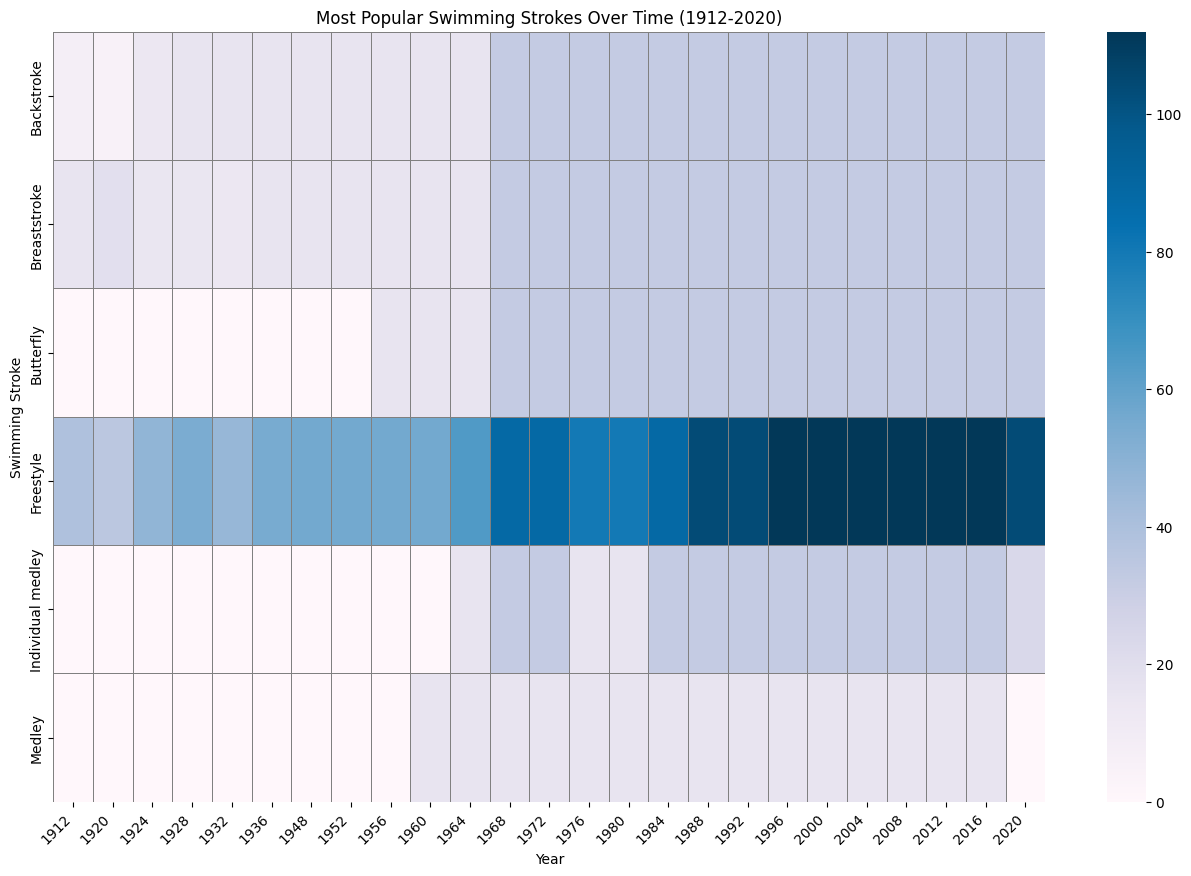

In [7]:
# Filter out missing values for relevant columns
df_cleaned = df.dropna(subset=["Year", "Stroke"])

# Group by year and stroke to count occurrences
event_counts = df_cleaned.groupby(["Year", "Stroke"]).size().reset_index(name="Count")

# Pivot the data to create a heatmap format (Years as columns, Strokes as rows)
heatmap_data = event_counts.pivot_table(index="Stroke", columns="Year", values="Count", fill_value=0)

# Plot the heatmap with the PuBu color palette (lighter = less frequent, darker = more frequent)
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="PuBu", linewidths=0.5, linecolor="gray")

# Formatting
plt.title("Most Popular Swimming Strokes Over Time (1912-2020)")
plt.xlabel("Year")
plt.ylabel("Swimming Stroke")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

Analysis: Freestyle is the most consistently contested stroke
The yellow/green band for Freestyle shows it has been a core event for a long time.
It became even more popular from the 1960s onward.
Butterfly stroke was introduced later
Notice Butterfly has no activity before the 1950s, meaning it was not part of the early Olympics.
After introduction, its presence gradually increased.
Medley & Individual Medley were introduced later
Similar to Butterfly, these strokes were not part of early Olympics.
They gained popularity in later years (1950s onward).
Gaps in certain years (e.g., 1940s)
These correspond to World War II (1940 & 1944) when the Olympics were not held.
Some strokes have fluctuating popularity
Medley events show gaps and varying intensities, indicating they were not consistently included every Olympics.
Breaststroke & Backstroke have relatively steady inclusion but less than Freestyle.

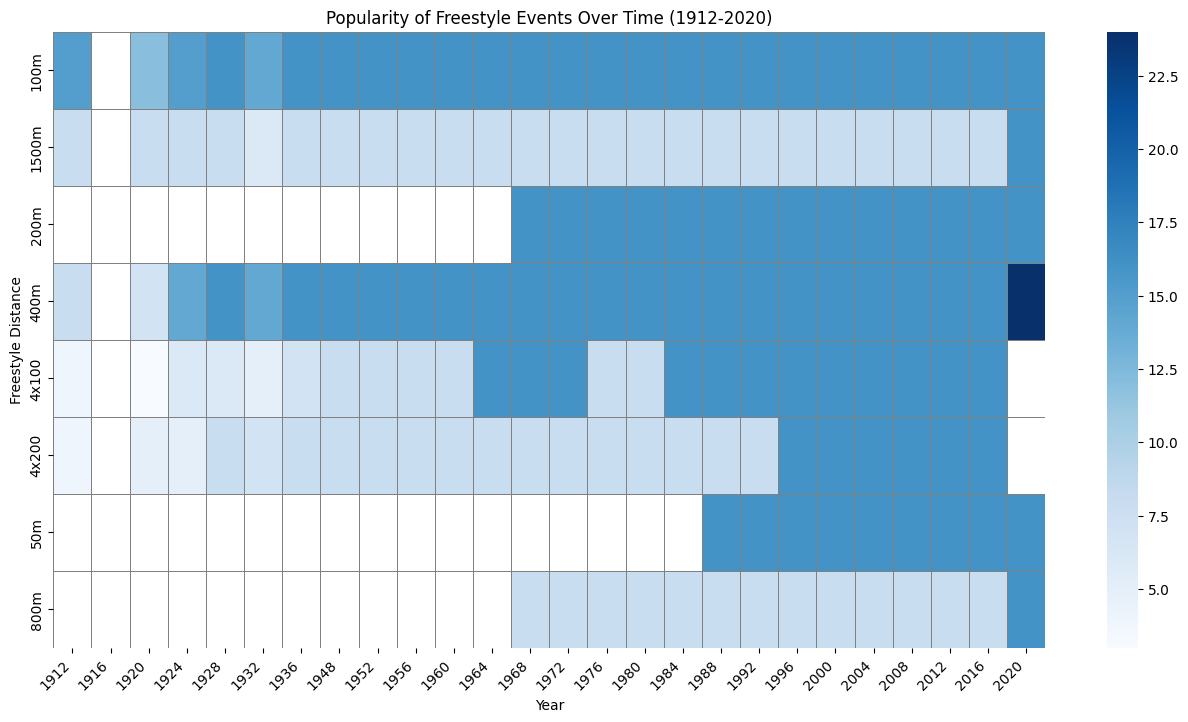

In [14]:
# Filter only freestyle events and remove missing values
freestyle_data = df[(df["Stroke"] == "Freestyle") & df["Distance (in meters)"].notna()]

# Group by year and distance to count occurrences
freestyle_counts = freestyle_data.groupby(["Year", "Distance (in meters)"]).size().reset_index(name="Count")

# Get all possible freestyle distances to ensure they appear on the y-axis
all_distances = sorted(freestyle_data["Distance (in meters)"].unique())  # Ensure correct order

# Define full Olympic years range (1912-2020, excluding war years)
olympic_years = list(range(1912, 2021, 4))  # Only up to 2020
if 1940 in olympic_years: olympic_years.remove(1940)  # Canceled due to WWII
if 1944 in olympic_years: olympic_years.remove(1944)  # Canceled due to WWII

# Create a complete grid with all distances and years to ensure missing events are visible
full_grid = pd.MultiIndex.from_product([all_distances, olympic_years], names=["Distance (in meters)", "Year"])
freestyle_counts = freestyle_counts.set_index(["Distance (in meters)", "Year"]).reindex(full_grid, fill_value=0).reset_index()

# Pivot the data to create a heatmap format (Years as columns, Distances as rows)
heatmap_data_freestyle = freestyle_counts.pivot(index="Distance (in meters)", columns="Year", values="Count")

# Replace zero values with NaN for better visualization of missing events
heatmap_data_freestyle.replace(0, np.nan, inplace=True)

# Create a masked array to make NaN values appear as white
mask = heatmap_data_freestyle.isna()

# Define a strictly blue color palette
blue_palette = sns.color_palette("Blues", as_cmap=True)

# Plot the heatmap with missing values in white
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data_freestyle, cmap=blue_palette, linewidths=0.5, linecolor="gray", cbar=True, mask=mask)

# Formatting
plt.title("Popularity of Freestyle Events Over Time (1912-2020)")
plt.xlabel("Year")
plt.ylabel("Freestyle Distance")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

Q2 - Which countries and athletes have dominated Olympic swimming?


Exploration 2a- which countries have athletes with the most gold medals

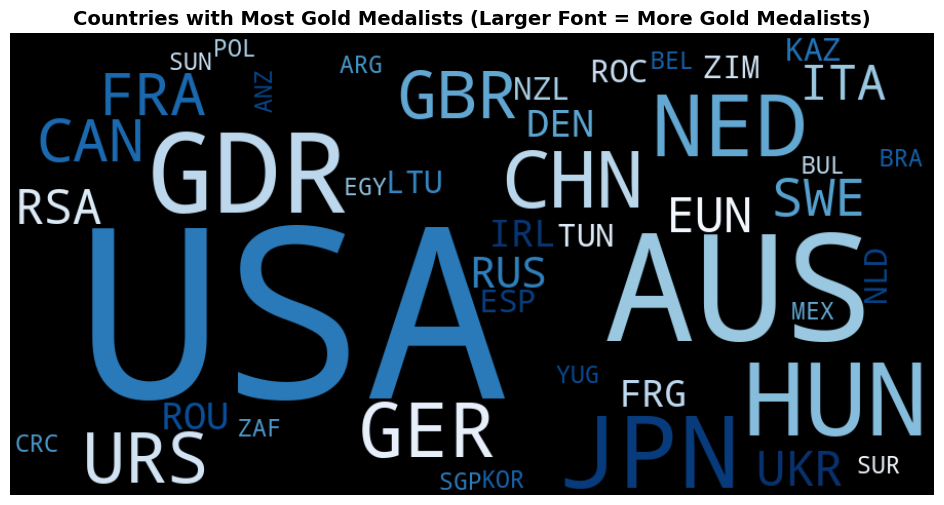

In [16]:
from wordcloud import WordCloud



# Assuming your original DataFrame is called 'df'
# Create a new DataFrame containing only gold medalists
gold_medalists = df[df["Rank"] == 1]

# Count the number of gold medalists per country
gold_medal_counts = gold_medalists.groupby("Team").size().to_dict()  # 'Team' contains country codes

# Generate word cloud based on gold medal counts
wordcloud = WordCloud(
    background_color="black",  # black background for contrast
    colormap="Blues",  # Use 'Blues' for clear shades
    contour_color="black",  # Add black outlines to improve visibility
    contour_width=1.5,  # Make contours thicker for emphasis
    width=900,  # Increase width for better layout
    height=450
).generate_from_frequencies(gold_medal_counts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes for better visualization
plt.title("Countries with Most Gold Medalists (Larger Font = More Gold Medalists)", fontsize=14, fontweight="bold")
plt.show()

Exploration 2a- which are the top 5 countries that have dominated swimming, segmented by male and female athletes.
Top 5 countries will be identfiied by countries with the most gold medals to highlight absolute dominance and underscore countries with the best swimmers

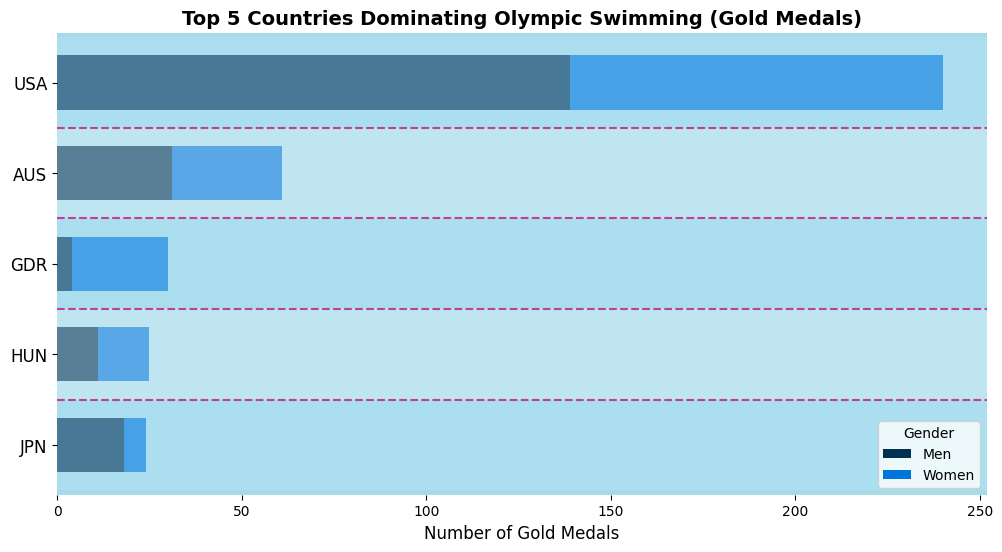

In [30]:
# Mapping of country codes to flag emojis


# Count the number of gold medals by country and gender
pivot_data = gold_medalists.pivot_table(index="Team", columns="Gender", values="Rank", aggfunc="count", fill_value=0)

# Keep only the **Top 5** countries with the most gold medals
top_countries = pivot_data.sum(axis=1).nlargest(5).index
pivot_data = pivot_data.loc[top_countries]



# Define improved blue shades for better contrast (Darker Navy for Men, Brighter Blue for Women)
bar_colors = ["#003153", "#0074D9"]  # Deep Navy Blue for Men, Vibrant Blue for Women

# Reverse the order so the country with the most medals is at the top
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=True).index]

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Create horizontal bars (stacked) with the enhanced blue shades
pivot_data.plot(kind="barh", stacked=True, ax=ax, color=bar_colors, width=0.6)

# **Enhance Swimming Lane Effect with Higher Contrast**
lane_count = len(pivot_data)  # Number of countries = Number of lanes
lane_colors = ["#B3E5FC", "#E1F5FE"]  # Stronger contrast between two shades of blue
for i in range(lane_count):
    ax.axhspan(i - 0.5, i + 0.5, facecolor=lane_colors[i % 2], alpha=0.4)  # Higher alpha for stronger effect

# **Dashed lane dividers between bars (light pink)**
for i in range(1, lane_count):
    ax.axhline(i - 0.5, color="#C71585", linestyle="--", linewidth=1.5, alpha=0.8)  # Light pink dashed lines

# Formatting
ax.set_title("Top 5 Countries Dominating Olympic Swimming (Gold Medals)", fontsize=14, fontweight="bold")
ax.set_xlabel("Number of Gold Medals", fontsize=12)
ax.set_ylabel("")  # Remove redundant y-axis label
ax.set_yticklabels(pivot_data.index, fontsize=12)  # Ensure country names are readable
ax.legend(title="Gender", loc="lower right", fontsize=10)
ax.set_facecolor("#A7DBE8")  # Slightly deeper water blue background

# Remove borders for a cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

# Show the improved plot
plt.show()

In [40]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Define 4 distinct shades of blue for 1, 2, 3, and 4 gold medals (No Gradient)
color_mapping = {
    1: "#a6cee3",  # Light Blue
    2: "#1770c4",  # Brighter Medium Blue
    3: "#004b87",  # Darker Blue
    4: "#021f4b"   # Deepest Blue
}

# Ensure athlete names include country codes only once
gold_medalists = gold_medalists.copy()  # Avoid modifying the original DataFrame
gold_medalists["Athlete"] = gold_medalists["Athlete"].str.replace(r"\(.*\)", "", regex=True).str.strip() + " (" + gold_medalists["Team"] + ")"

# Create figure with distinct colors (No gradient color bar, No black background)
fig = go.Figure()

# Group by athlete to count total gold medals
top_athletes = (
    gold_medalists.groupby("Athlete")["Athlete"].count()
    .nlargest(5)
    .index
)

# Filter dataset for only the top 5 athletes
top_gold_medalists = gold_medalists[gold_medalists["Athlete"].isin(top_athletes)]

# Create a new column combining stroke and distance (ensuring correct format)
top_gold_medalists["Event"] = top_gold_medalists["Stroke"] + " " + top_gold_medalists["Distance (in meters)"].astype(str)

# Count number of gold medals per event for each athlete
bubble_data = top_gold_medalists.groupby(["Athlete", "Event"]).size().reset_index(name="Gold Medals")

for medals, color in color_mapping.items():
    filtered_data = bubble_data[bubble_data["Gold Medals"] == medals]
    fig.add_trace(go.Scatter(
        x=filtered_data["Event"],
        y=filtered_data["Athlete"],
        mode='markers',  # Remove text above bubbles
        marker=dict(
            size=filtered_data["Gold Medals"] * 25,  # Adjust bubble size dynamically
            color=color,
            line=dict(width=1, color="black")
        ),
        name=f"{medals} Gold{'s' if medals > 1 else ''}"  # Keep only in the legend
    ))

# Adjust layout to make the graph smaller and reduce empty white space
fig.update_layout(
    title="Top 5 Gold Medalist Swimmers by Stroke & Distance Specialization",
    width=900,  # Reduce width for a more compact layout
    height=550,  # Reduce height to minimize white space
    margin=dict(l=30, r=30, t=50, b=50),  # Reduce excessive margin space
    xaxis=dict(
        tickangle=-30,
        showgrid=True,
        zeroline=True,
        tickmode="array",
        tickvals=list(range(len(bubble_data["Event"].unique()))),
        ticktext=bubble_data["Event"].unique(),
        showline=True,
        linewidth=2,
        linecolor="black",
        automargin=True  # Ensures labels fit properly
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=True,
        categoryorder="total descending",
        showline=True,
        linewidth=2,
        linecolor="black",
        automargin=True  # Ensures labels don't get cut off
    ),
    legend_title="Gold Medals",
    font=dict(size=12, color="black"),  # Adjust font size for better readability
    plot_bgcolor="white",  # Keep white background
    paper_bgcolor="white"  # Ensure full figure background remains white
)

# Show the updated interactive plot with better scaling
fig.show()

<ipython-input-40-1400c8d8465a>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

